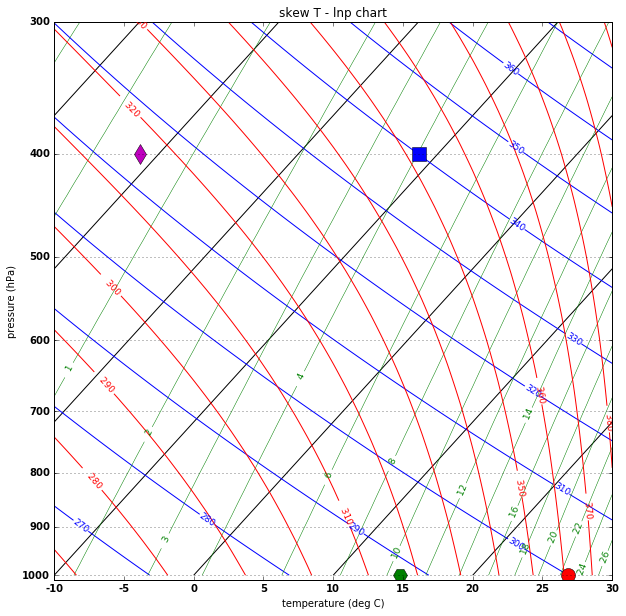

In [70]:
from a405thermo.thermlib import find_Td, find_rsat, find_thetaes, find_thetaet, find_Tmoist, convertTempToSkew
from a405thermo.thermlib import find_rvrl
from a405thermo.constants import constants as c
from importlib import reload
import a405skewT.makeSkewII
reload(a405skewT.makeSkewII)
from a405skewT.makeSkewII import makeSkewWet
%matplotlib inline

pa2hPa=1.e-2

fig.clf()
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax, skew = makeSkewWet(ax,corners=[-10,30])
ax.set(ylim=[1010,300])

temp0 = 300 # K
press0 = 1e5 # Pa
press1 = 4e4 # Pa
RH = 0.8
rsat0 = find_rsat(temp0,press0)
r_v0 = RH*rsat0
Td_0 = find_Td(r_v0,press0)

xplot = convertTempToSkew(temp0-c.Tc,press0*pa2hPa,skew)
bot=ax.plot(xplot, press0*pa2hPa, 'ro', markersize=14, markerfacecolor='r')

# Step 1 (red circle to blue square) -> Losing 80% of liquid water as it rises to 400 hPa

rvrl = find_rvrl(T_400,r_v0,press1)
rl_dry = rvrl[1]-0.8*rvrl[1]
rT_dry = rvrl[0]+rl_dry
thetaet_new = find_thetaet(Td_0,rT_dry,temp0,press0)

T_400 = find_Tmoist(thetaet_new,press1)
xplot = convertTempToSkew(T_400-c.Tc,press1*pa2hPa,skew)
bot=ax.plot(xplot, press1*pa2hPa, 'bs', markersize=14, markerfacecolor='b')

# Step 2 (blue square to magenta diamond) -> cools by 20 K isobarically, conserving new total water

isoT_400 = T_400-20 # K
xplot = convertTempToSkew(isoT_400-c.Tc,press1*pa2hPa,skew)
bot=ax.plot(xplot, press1*pa2hPa, 'md', markersize=14, markerfacecolor='m')

# Step 3 (magenta diamond to green hexagon)

newthetaes = find_thetaes(isoT_400,press1)
tempfinal = find_Tmoist(newthetaes,press0)

xplot = convertTempToSkew(tempfinal-c.Tc,press0*pa2hPa,skew)
bot=ax.plot(xplot, press0*pa2hPa, 'gH', markersize=14, markerfacecolor='g')